In [54]:
import os
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import r2_score

In [ ]:
path = kagglehub.dataset_download("mohansacharya/graduate-admissions")
print("Path to dataset files:", path)
files = os.listdir(path)
print("Files in dataset folder:", files)

100%|██████████| 9.64k/9.64k [00:00<00:00, 11.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mohansacharya/graduate-admissions/versions/2
Files in dataset folder: ['Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv']


In [ ]:
csv_path = os.path.join(path, files[0])
df = pd.read_csv(csv_path)

In [ ]:
print("Dataset loaded successfully")
df = pd.read_csv(csv_path)
df.head()

Dataset loaded successfully


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.columns = df.columns.str.strip()  # removes leading/trailing spaces
df.drop(['Serial No.'], axis=1, inplace=True)


In [17]:
print(df.columns.tolist())

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']


In [19]:
X = df.drop(columns=['Chance of Admit'])
y = df['Chance of Admit']

In [20]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [21]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [22]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [23]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
303,323,107,3,3.5,3.5,8.55,1
202,340,120,5,4.5,4.5,9.91,1
349,313,101,3,2.5,3.0,8.04,0
272,294,95,1,1.5,1.5,7.64,0
192,322,114,5,4.5,4.0,8.94,1
...,...,...,...,...,...,...,...
385,335,117,5,5.0,5.0,9.82,1
197,310,106,2,3.5,2.5,8.33,0
439,312,105,2,1.5,3.0,8.46,0
174,321,111,4,4.0,4.0,8.97,1


In [24]:
X_train.shape

(400, 7)

In [25]:
X_test.shape

(100, 7)

In [26]:
X.shape

(500, 7)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled

array([[0.66      , 0.53571429, 0.5       , ..., 0.625     , 0.56089744,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       [0.46      , 0.32142857, 0.5       , ..., 0.5       , 0.3974359 ,
        0.        ],
       ...,
       [0.44      , 0.46428571, 0.25      , ..., 0.5       , 0.53205128,
        0.        ],
       [0.62      , 0.67857143, 0.75      , ..., 0.75      , 0.69551282,
        1.        ],
       [0.4       , 0.5       , 0.75      , ..., 0.375     , 0.5       ,
        0.        ]])

In [56]:
model = Sequential()
model.add(Dense(32,activation='relu', input_dim=7))
model.add(Dense(16,activation='relu', input_dim=7))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss='mean_squared_error',optimizer='Adam', metrics=['accuracy'])

In [64]:
history = model.fit(X_train_scaled, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.0000e+00 - loss: 0.0034 - val_accuracy: 0.0000e+00 - val_loss: 0.0044
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.0035 - val_accuracy: 0.0000e+00 - val_loss: 0.0045
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0031 - val_accuracy: 0.0000e+00 - val_loss: 0.0044
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0034 - val_accuracy: 0.0000e+00 - val_loss: 0.0043
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0034 - val_accuracy: 0.0000e+00 - val_loss: 0.0044
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0033 - val_accuracy: 0.0000e+00 - val_loss: 0.0043
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0032 - val_accuracy: 0.0000e+00 - val_loss: 0.0044
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc

In [61]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [62]:
y_pred

array([[0.80002975],
       [0.87025654],
       [0.63390017],
       [0.8833579 ],
       [0.979866  ],
       [0.7454275 ],
       [0.61895514],
       [0.8179518 ],
       [0.7506864 ],
       [0.8378204 ],
       [0.6236247 ],
       [0.55043644],
       [0.7752303 ],
       [0.7042742 ],
       [0.79077256],
       [0.61537313],
       [0.5692631 ],
       [0.6828106 ],
       [0.83850074],
       [0.6227013 ],
       [0.5762476 ],
       [0.71232665],
       [0.8131569 ],
       [0.7300625 ],
       [0.5495546 ],
       [0.49664536],
       [0.5797983 ],
       [0.5965151 ],
       [0.95554125],
       [0.69153845],
       [0.97737384],
       [0.8182567 ],
       [0.8681819 ],
       [0.85987324],
       [0.8274719 ],
       [0.79310775],
       [0.6170485 ],
       [0.6229991 ],
       [0.6414423 ],
       [0.91462344],
       [0.70609856],
       [0.9531251 ],
       [0.8723264 ],
       [0.81916773],
       [0.82973045],
       [0.61316085],
       [0.86160326],
       [0.756

In [63]:
r2_score(y_test,y_pred)

0.7626212191835507

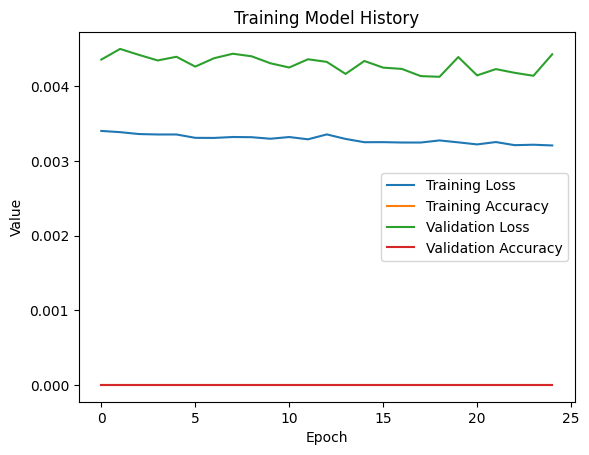

In [68]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")

plt.title("Training Model History")
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()